In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

# Create a color palette
seaborn_palette = sns.color_palette("rocket")

# Create a colormap
seaborn_colormap = ListedColormap(seaborn_palette.as_hex())

In [2]:
credit = pd.read_excel('datasets/CREDIT CARD TXNS_PJDSC.xlsx')
customer = pd.read_excel('datasets/CUSTOMER INFO_PJDSC.xlsx')
debit = pd.read_excel('datasets/DEBIT CARD TXNS_PJDSC.xlsx')
digital = pd.read_excel('datasets/FINANCIAL DIGITAL TXNS_PJDSC.xlsx')
incoming = pd.read_excel('datasets/INCOMING INSTAPAY TXNS_PJDSC.xlsx')
outgoing = pd.read_excel('datasets/OUTGOING INSTAPAY TXNS_PJDSC.xlsx')

In [3]:
digital['DATE'] = digital['DATE_AND_TIME'].dt.strftime('%Y-%m-%d')
digital['TIME'] = digital['DATE_AND_TIME'].dt.strftime('%H:%M:%S')
digital.drop(['DATE_AND_TIME'], inplace=True, axis=1)

In [4]:
dfs = [credit, customer, debit, digital, incoming, outgoing]
for df in dfs:
    # Remove duplicates
    df.drop_duplicates(keep = 'first', inplace=True)

    # Check nulls
    print(df.isna().sum())

CUST_NUM          0
MERCH_GROUP    1568
DATE              0
AMOUNT            0
CHANNEL           0
MERCH_NAME        0
COUNTRY        1249
dtype: int64
CUST_NUM           0
PROVINCE           0
REGION             0
EDUCATION          0
AGE               22
TENURE             0
BUSINESS_OWNER     0
DIGITAL_FLAG       0
INCOME_SOURCE      0
IDV_OR_ORG         0
SEGMENT            0
SUBSEGMENT         0
GENDER             0
MARITAL_STATUS     0
dtype: int64
CUST_NUM    0
CHANNEL     0
DATE        0
TIME        0
AMOUNT      0
dtype: int64
CUST_NUM     0
AMOUNT       0
CHANNEL      0
TRAN_TYPE    0
DATE         0
TIME         0
dtype: int64
CUST_NUM         0
DATE             0
TIME             0
AMOUNT           0
BPI_ACCT_TYPE    0
SRC_BANK_NAME    0
dtype: int64
CUST_NUM         0
DATE             0
TIME             0
AMOUNT           0
CHANNEL          0
RCV_BANK_NAME    0
dtype: int64


In [5]:
customer['PROVINCE'].value_counts()['SULTAN KUDARAT']

154

In [6]:
digital['DATE'] = pd.to_datetime(digital['DATE'])
maydatetrnxs = digital[(digital['DATE'].dt.month==5) & (digital['DATE'].dt.year==2023)]

In [7]:
maytotal = digital['AMOUNT'].sum()
print(maytotal)

590802392.1602379


In [8]:
out_by_bank = outgoing.groupby("RCV_BANK_NAME")

In [9]:
out_by_bank.sum().sort_values(by='AMOUNT', ascending=False)

,CUST_NUM,TIME,AMOUNT
RCV_BANK_NAME,,,
HUMAN,2.215629e+08,1186196126,7.897188e+07
DOG,4.311800e+07,230896281,5.826293e+07
ELEPHANT,1.523645e+07,79644079,1.899676e+07
CAT,1.699623e+07,94338389,1.849136e+07
HORSE,1.817634e+07,93411862,1.681834e+07
LION,1.025186e+07,54029060,1.237393e+07
TIGER,5.655011e+06,31193485,8.954879e+06
KANGAROO,3.717585e+06,19076439,6.658182e+06
GIRAFFE,1.287373e+07,66035652,6.417865e+06


In [10]:
credit['COUNTRY'].value_counts().head(3)

PH           27441
COUNTRY 2     1124
COUNTRY 4      702
Name: COUNTRY, dtype: int64

In [11]:
duplicates = customer.duplicated()
duplicate_count = duplicates.sum()

In [12]:
print(duplicate_count)

0


In [13]:
customer = customer[customer.AGE.isna() | (customer.AGE > customer.TENURE)]

In [14]:
dfs = [credit, customer, debit, digital, incoming, outgoing]
for df in dfs:
    duplicates = df.duplicated()
    duplicate_count = duplicates.sum()
    print(duplicate_count)

0
0
0
0
0
0


In [15]:
customer['REGION'].value_counts()

REGION VI (WESTERN VISAYAS)               6835
REGION I (ILOCOS REGION)                  5853
REGION III (CENTRAL LUZON)                5774
REGION X (NORTHERN MINDANAO)              5352
REGION V (BICOL REGION)                   3211
REGION VII (CENTRAL VISAYAS)              3079
CORDILLERA ADMINISTRATIVE REGION (CAR)    2738
REGION II (CAGAYAN VALLEY)                2673
REGION XII (SOCCSKSARGEN)                 2644
REGION IX (ZAMBOANGA PENINSULA)           2210
REGION VIII (EASTERN VISAYAS)             1947
REGION XIII (CARAGA)                      1381
REGION XI (DAVAO REGION)                  1295
MIMAROPA REGION                           1150
Name: REGION, dtype: int64

### Data Integration

We will merge the relevant datasets based on a common identifier, such as 'CUST_NUM', to create comprehensive datasets for analysis.

In [16]:
cred_cust = pd.merge(credit, customer, on='CUST_NUM', how='inner')
cred_cust.head()

,CUST_NUM,MERCH_GROUP,DATE,AMOUNT,CHANNEL,MERCH_NAME,COUNTRY,PROVINCE,REGION,EDUCATION,AGE,TENURE,BUSINESS_OWNER,DIGITAL_FLAG,INCOME_SOURCE,IDV_OR_ORG,SEGMENT,SUBSEGMENT,GENDER,MARITAL_STATUS
0,3016.966026,Retail Outlet Services,2023-04-01,3211.528727,POS-RETAIL PURCHASE,MERCHANT 1,PH,ISABELA,REGION II (CAGAYAN VALLEY),MID,25.0,1.083333,N,DIGITAL,SALARY,1,3,CORE MASS,MALE,DIVORCED
1,3016.966026,Clothing Stores,2023-04-01,3982.218215,POS-RETAIL PURCHASE,MERCHANT 2,PH,ISABELA,REGION II (CAGAYAN VALLEY),MID,25.0,1.083333,N,DIGITAL,SALARY,1,3,CORE MASS,MALE,DIVORCED
2,3016.966026,Miscellaneous Stores,2023-04-18,872.539734,POS-RETAIL PURCHASE,MERCHANT 3,PH,ISABELA,REGION II (CAGAYAN VALLEY),MID,25.0,1.083333,N,DIGITAL,SALARY,1,3,CORE MASS,MALE,DIVORCED
3,3016.966026,Miscellaneous Stores,2023-04-27,390.082187,POS-RETAIL PURCHASE,MERCHANT 4,PH,ISABELA,REGION II (CAGAYAN VALLEY),MID,25.0,1.083333,N,DIGITAL,SALARY,1,3,CORE MASS,MALE,DIVORCED
4,3016.966026,Retail Outlet Services,2023-04-29,4956.055464,ONLINE-RETAIL PURCHASE,MERCHANT 5,PH,ISABELA,REGION II (CAGAYAN VALLEY),MID,25.0,1.083333,N,DIGITAL,SALARY,1,3,CORE MASS,MALE,DIVORCED


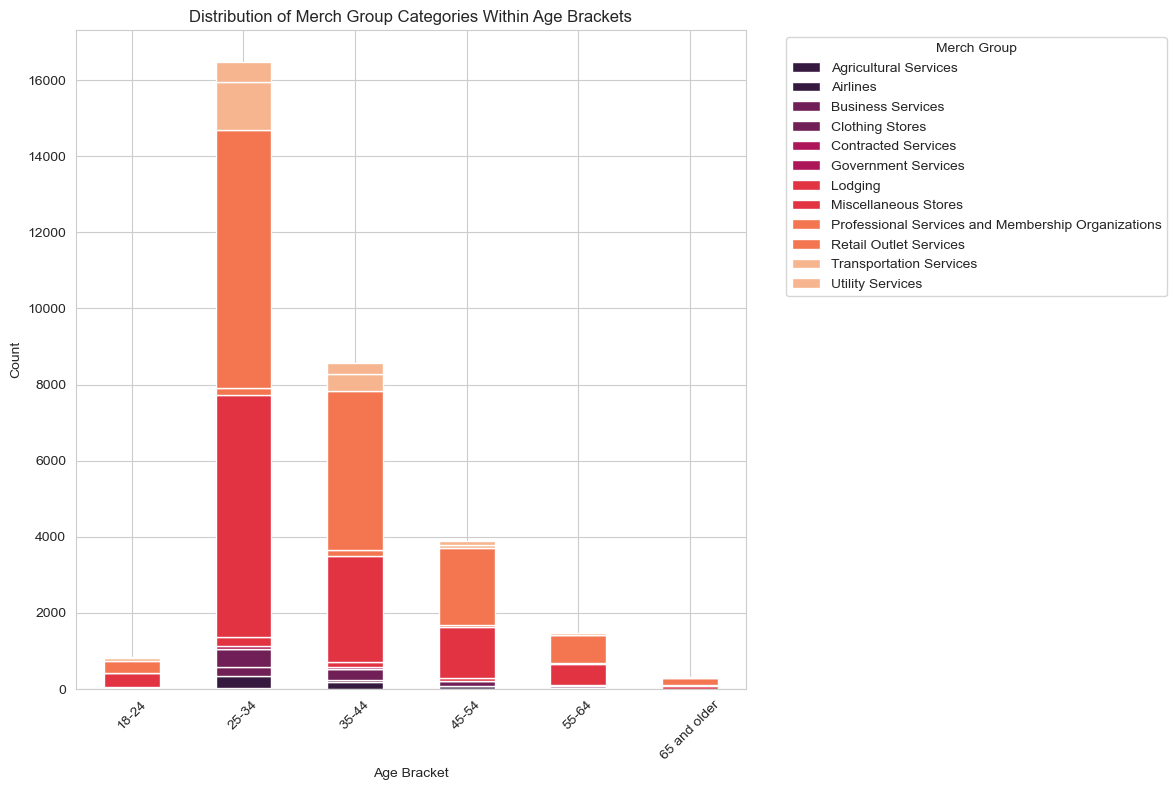

In [24]:
cred_cust['AGE'] = pd.to_numeric(cred_cust['AGE'], errors='coerce')

age_brackets = ['1-17','18-24', '25-34', '35-44', '45-54', '55-64', '65 and older']

# Create a function to categorize individuals into age brackets
def categorize_age(age):
    if isinstance(age, (int, float)):
        # If age is already a number, categorize it into age brackets
        if age < 18:
            return '1-17'
        elif 18 <= age <= 24:
            return '18-24'
        elif 25 <= age <= 34:
            return '25-34'
        elif 35 <= age <= 44:
            return '35-44'
        elif 45 <= age <= 54:
            return '45-54'
        elif 55 <= age <= 64:
            return '55-64'
        else:
            return '65 and older'
    elif isinstance(age, str):
        # Check for age representations like "X-Y" and extract a midpoint
        if '-' in age:
            age_range = age.split('-')
            try:
                lower_age = float(age_range[0])
                upper_age = float(age_range[1])
                midpoint = (lower_age + upper_age) / 2
                return categorize_age(midpoint)
            except ValueError:
                return 'Unknown'
        else:
            # Handle other non-integer age representations here, if necessary
            return 'Unknown'
    else:
        return 'Unknown'  # Handle unexpected data types

# Apply the age categorization function to create an 'AGE_BRACKET' column
cred_cust['AGE_BRACKET'] = cred_cust['AGE'].apply(categorize_age)

# Create a bar plot
plt.figure(figsize=(12, 8))

# Count the occurrences of 'MERCH_GROUP' categories within each age bracket
counts = cred_cust.groupby(['AGE_BRACKET', 'MERCH_GROUP']).size().unstack(fill_value=0)

# Plot the bar chart
counts.plot(kind='bar', stacked=True, ax=plt.gca(), cmap = seaborn_colormap)

plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.title('Distribution of Merch Group Categories Within Age Brackets')
plt.xticks(rotation=45)
plt.legend(title='Merch Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

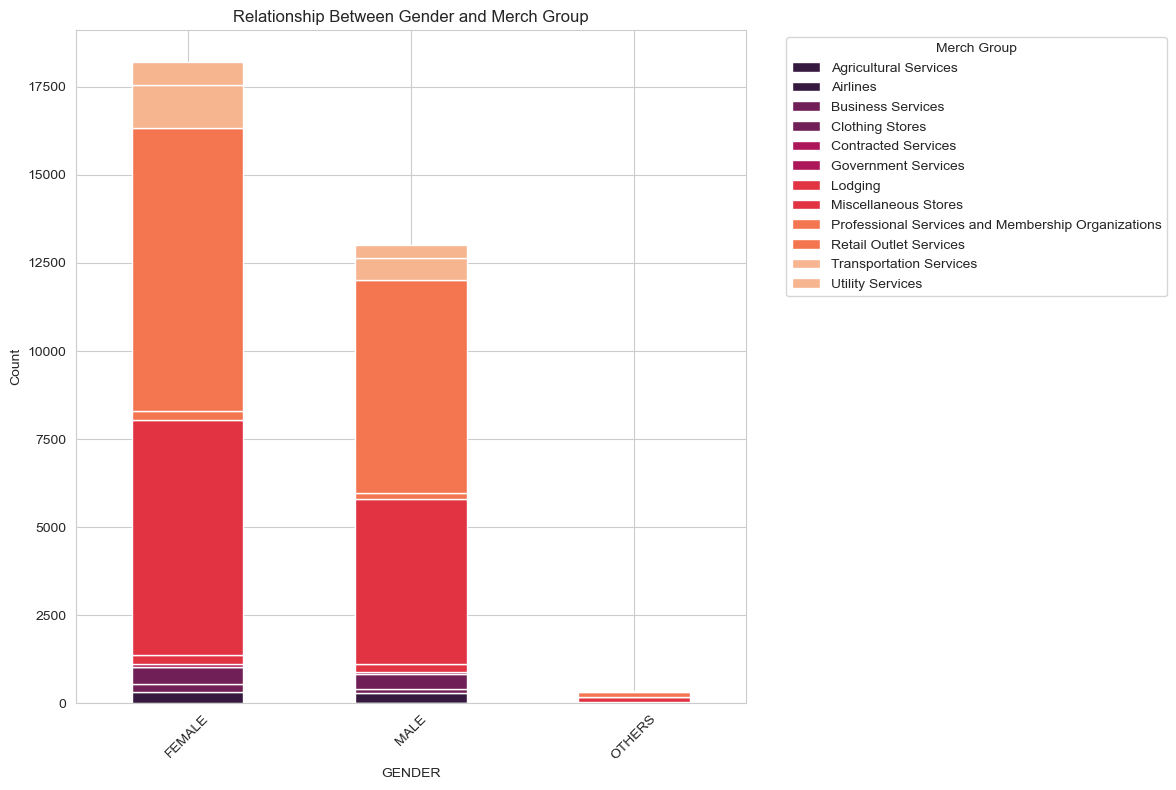

In [23]:
# Create a bar plot to visualize the relationship between 'MERCH_GROUP' and 'GENDER'
plt.figure(figsize=(12, 8))

# Count the occurrences of 'GENDER' categories within each 'MERCH_GROUP'
counts_gender = cred_cust.groupby(['GENDER', 'MERCH_GROUP']).size().unstack(fill_value=0)

# Plot the bar chart
counts_gender.plot(kind='bar', stacked=True, ax=plt.gca(), cmap=seaborn_colormap)

plt.xlabel('GENDER')
plt.ylabel('Count')
plt.title('Relationship Between Gender and Merch Group')
plt.xticks(rotation=45)
plt.legend(title='Merch Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()